In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


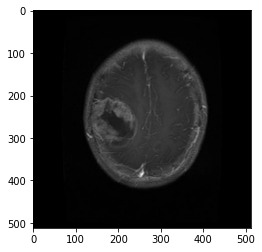

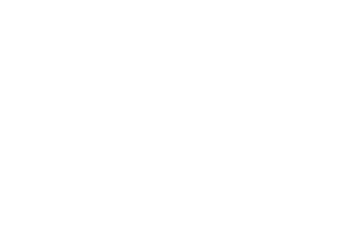

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os


DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

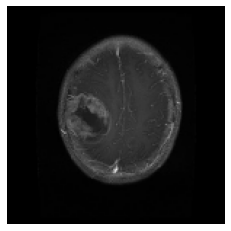

In [3]:
#Reshaping all the images to 150X150
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [4]:
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
X_train = []
y_train = []
for features_train,label_train in training_data:
    X_train.append(features_train)
    y_train.append(label_train)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_train.shape)
X_train = X_train/255.0  
X_train = X_train.reshape(-1,150,150,1)

(2881, 150, 150)


Load the test images in the same way

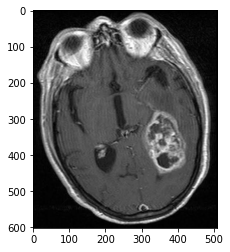

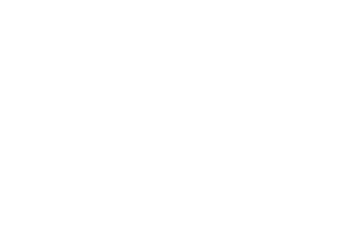

In [6]:
DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Testing"
#CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array1 = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array1)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

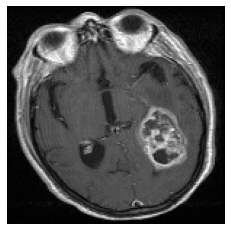

In [7]:
#Reshaping all the images to 150X150
IMG_SIZE = 150
new_array1 = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array1,cmap = "gray")
plt.axis("off")

In [8]:
#Storing all the testing images
test_data = []
#CATEGORIES = ["glioma_tumor","no_tumor","glioma_tumor","no_tumor"]
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE)) 
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()

In [9]:

X_test = []
y_test = []
for features_test,label_test in test_data:
    X_test.append(features_test)
    y_test.append(label_test)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)

(402, 150, 150)


In [10]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [11]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical as ms 

# fix random seed for reproducibility
seed = 7

np.random.seed(seed)

In [12]:

from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [22]:

from tensorflow.keras import losses
from tensorflow.keras import optimizers

model_1 = Sequential()

    # adding first conv layer with 16 filters and with kernel size 3, padding same provided the output size same as the input size and input_shape denotes input image dimension of CIFAR
    # images
model_1.add(Conv2D(filters=128, kernel_size=3, padding="same", input_shape=(150, 150, 1)))

model_1.add(MaxPool2D(pool_size=2))

     # adding leaky relu activation function with negative slope of 0.1
model_1.add(LeakyReLU(0.1))


     # adding second conv layer with 32 filters and with kernel size 3
model_1.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_1.add(LeakyReLU(0.1))
model_1.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_1.add(LeakyReLU(0.1))
         # flattening the 3-d output of fourth conv layer after max pooling to make it ready for creating dense connections with the output layer for predictions
model_1.add(Flatten())

    
model_1.add(Dense(256))

model_1.add(Dense(4, activation='softmax'))
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    
)



model_1.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [25]:
history_model_1 = model_1.fit(X_train, y_train_encoded, batch_size=32,
validation_data=(X_test, y_test_encoded),
epochs=20)

Epoch 1/20
91/91 [==============================] - 11s 120ms/step - loss: 0.0472 - accuracy: 0.9826 - val_loss: 5.8291 - val_accuracy: 0.7488
Epoch 2/20
91/91 [==============================] - 11s 119ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 6.8877 - val_accuracy: 0.7711
Epoch 3/20
91/91 [==============================] - 11s 120ms/step - loss: 0.0223 - accuracy: 0.9913 - val_loss: 6.8131 - val_accuracy: 0.7612
Epoch 4/20
91/91 [==============================] - 11s 121ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 9.8908 - val_accuracy: 0.7313
Epoch 5/20
91/91 [==============================] - 11s 121ms/step - loss: 0.0164 - accuracy: 0.9924 - val_loss: 8.9268 - val_accuracy: 0.7711
Epoch 6/20
91/91 [==============================] - 11s 120ms/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 8.6864 - val_accuracy: 0.7761
Epoch 7/20
91/91 [==============================] - 11s 120ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 9.1853 - val_accuracy: 0.7637

In [26]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 128)     1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 75, 75, 128)      

[INFO] evaluating network...
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.18      0.31       100
meningioma_tumor       0.75      0.98      0.85       115
        no_tumor       0.72      1.00      0.83       113
 pituitary_tumor       0.89      0.91      0.90        74

        accuracy                           0.77       402
       macro avg       0.84      0.77      0.72       402
    weighted avg       0.83      0.77      0.72       402



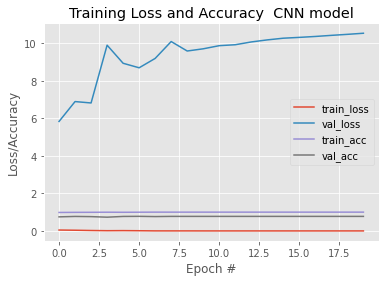

In [28]:
from sklearn.metrics import classification_report


# evaluate the network
print("[INFO] evaluating network...")
predictions = model_1.predict(X_test, batch_size=32)
print(classification_report(y_test_encoded.argmax(axis=1),
predictions.argmax(axis=1), target_names=CATEGORIES))
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), history_model_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history_model_1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), history_model_1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), history_model_1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy  CNN model")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [29]:
# predict on the test dataset        
# Your code here
y_pred_test = model_1.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test, y_pred_test_classes)

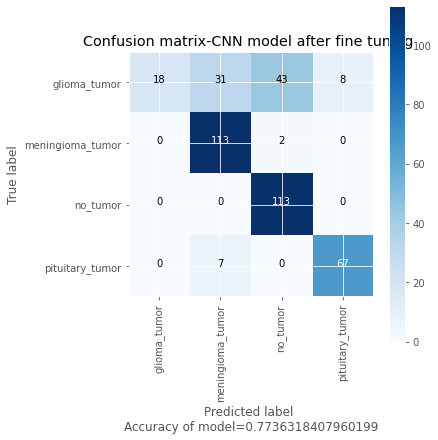

Accuracy of model=0.7736318407960199


In [31]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix-CNN model after fine tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \nAccuracy of model='+str(ac))
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)
print("Accuracy of model="+str(ac))